# Using Astropy Units

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html

This tutorial introduces us to [`astropy.units`], which is heavily used in PlasmaPy.

Let's start with some preliminary imports. To execute a cell in a Jupyter notebook, press **Shift + Enter**.  If you need to restart the notebook, please execute this cell again.

If using Google Colab, click **Run anyway** when prompted.  (If prompted again, select **Restart runtime** when the installation finishes.)

In [1]:
%matplotlib inline

import sys

if 'google.colab' in str(get_ipython()):
    if 'plasmapy' not in sys.modules:
        !pip install astropy matplotlib numpy

import astropy.units as u
from astropy.visualization import quantity_support
from astropy import constants
import matplotlib.pyplot as plt
import numpy as np

## Motivation

In scientific computing, we often represent physical quantities as numbers.

In [2]:
distance_in_miles = 50
time_in_hours = 2
velocity_in_mph = distance_in_miles / time_in_hours
print(velocity_in_mph)

25.0


[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[`plasmapy.particles`]: ../../particles/index.rst
[`plasmapy.formulary`]: ../../formulary/index.rst

Representing a physical quantity as a number has risks. We might unknowingly perform operations with different units, like `time_in_seconds + time_in_hours`. We might even accidentally perform operations with physically incompatible units, like `length + time`, without catching our mistake. Unit conversion errors can be costly mistakes, such as the loss of spacecraft like the [Mars Climate Orbiter](https://science.nasa.gov/mission/mars-climate-orbiter).

We can avoid these problems by using a units package. This notebook introduces [`astropy.units`] with an emphasis on the functionality needed to work with [`plasmapy.particles`] and [`plasmapy.formulary`]. We typically import [`astropy.units`] subpackage as `u`.

## Unit essentials

We can create a _physical quantity_ by multiplying or dividing a number or array with a unit.

In [3]:
distance = 60 * u.km
print(distance)

60.0 km


[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

This operation creates a [`Quantity`] object: a number, sequence, or array that has been assigned a physical unit.

In [4]:
type(distance)

astropy.units.quantity.Quantity

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can create an object by using the [`Quantity`] class itself.

In [5]:
time = u.Quantity(120, u.min)

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can create [`Quantity`] objects with compound units.

In [6]:
88 * u.imperial.mile / u.hour

<Quantity 88. mi / h>

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can even create [`Quantity`] objects that are explicitly dimensionless. 

In [7]:
3 * u.dimensionless_unscaled

<Quantity 3.>

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can also create a [`Quantity`] based off of a NumPy array or a list.

In [8]:
np.array([2.5, 3.2, 1.1]) * u.kg

<Quantity [2.5, 3.2, 1.1] kg>

In [9]:
[2, 3, 4] * u.m / u.s

<Quantity [2., 3., 4.] m / s>

## Unit operations

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

Operations between [`Quantity`] objects handle unit conversions automatically. We can add [`Quantity`] objects together as long as their units have the same physical type.

In [10]:
1 * u.m + 25 * u.cm

<Quantity 1.25 m>

Units get handled automatically during operations like multiplication, division, and exponentiation.

In [11]:
velocity = distance / time
print(velocity)

0.5 km / min


In [12]:
area = distance**2
print(area)

3600.0 km2


Attempting an operation between physically incompatible units gives us an error, which we can use to find bugs in our code.

In [13]:
3 * u.m + 3 * u.s

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`numpy.ndarray`]: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

[`Quantity`] arrays behave very similarly to NumPy arrays. In fact, [`Quantity`] is a subclass of [`numpy.ndarray`].

In [14]:
balmer_series = [656, 486, 434, 410] * u.nm
Hα = balmer_series[0]
print(Hα)

656.0 nm


In [15]:
np.max(balmer_series)

<Quantity 656. nm>

[NumPy]: https://numpy.org/
[SciPy]: https://scipy.org/

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[lose their units]: https://docs.astropy.org/en/stable/known_issues.html#quantities-lose-their-units-with-some-operations

⚠️ Most frequently encountered [NumPy] and [SciPy] functions can be used with [`Quantity`] objects. However, there are some functions that cause [`Quantity`] objects to [lose their units]!

## Unit conversions

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`to`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.to

The [`to`] method allows us to convert a [`Quantity`] to different units of the same physical type. This method accepts strings that represent a unit (including compound units) or a unit object.

In [16]:
velocity.to("m/s")

<Quantity 8.33333333 m / s>

In [17]:
velocity.to(u.m / u.s)

<Quantity 8.33333333 m / s>

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`si`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.si
[`cgs`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.cgs

The [`si`] and [`cgs`] attributes convert the [`Quantity`] to SI or CGS units, respectively. 

In [18]:
velocity.si

<Quantity 8.33333333 m / s>

In [19]:
velocity.cgs

<Quantity 833.33333333 cm / s>

## Detaching units and values

[`value`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.value 
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

The [`value`] attribute of a [`Quantity`] provides the number or array *without* the unit.

In [20]:
time.value

120.0

[`unit`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.unit
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

The [`unit`] attribute of a [`Quantity`] provides the unit without the value.

In [21]:
time.unit

Unit("min")

## Equivalencies

[electron-volt]: https://en.wikipedia.org/wiki/Electronvolt
[Boltzmann constant]: https://en.wikipedia.org/wiki/Boltzmann_constant

Plasma scientists often use the [electron-volt] (eV) as a unit of temperature. This is a shortcut for describing the thermal energy per particle, or more accurately the temperature multiplied by the [Boltzmann constant], $k_B$. Because an electron-volt is a unit of energy rather than temperature, we cannot directly convert electron-volts to kelvin.

In [22]:
u.eV.to("K")

UnitConversionError: 'eV' (energy/torque/work) and 'K' (temperature) are not convertible

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[equivalencies]: https://docs.astropy.org/en/stable/units/equivalencies.html
[`temperature_energy()`]: https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency

To handle non-standard unit conversions, [`astropy.units`] allows the use of [equivalencies]. The conversion from eV to K can be done by using the [`temperature_energy()`] equivalency.

In [23]:
(1 * u.eV).to("K", equivalencies=u.temperature_energy())

<Quantity 11604.51812155 K>

[`dimensionless_angles()`]: https://docs.astropy.org/en/stable/api/astropy.units.equivalencies.dimensionless_angles.html#dimensionless-angles

[frequency]: https://en.wikipedia.org/wiki/Frequency
[angular frequency]: https://en.wikipedia.org/wiki/Angular_frequency

Radians are treated dimensionlessly when the [`dimensionless_angles()`] equivalency is in effect. Note that this equivalency does not account for the multiplicative factor of $2π$ that is used when converting between [frequency] and [angular frequency].

In [24]:
(3.2 * u.rad / u.s).to("1 / s", equivalencies=u.dimensionless_angles())

<Quantity 3.2 1 / s>

## Physical constants

[`astropy.constants`]: https://docs.astropy.org/en/stable/constants/index.html

fWe can use [`astropy.constants`] to access the most commonly needed physical constants.

In [25]:
from astropy import constants
print(constants.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


[`Constant`]: https://docs.astropy.org/en/stable/api/astropy.constants.Constant.html#astropy.constants.Constant
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`u.temperature_energy()`]: https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency

A [`Constant`] behaves very similarly to a [`Quantity`]. For example, we can use the Boltzmann constant to mimic the behavior of [`u.temperature_energy()`].

In [26]:
thermal_energy_per_particle = 0.6 * u.keV
temperature = thermal_energy_per_particle / constants.k_B
print(temperature.to("MK"))

6.962710872930049 MK


Electromagnetic constants often need the unit system to be specified, or will result in an exception.

In [27]:
2 * constants.e

TypeError: Constant 'e' does not have physically compatible units across all systems of units and cannot be combined with other values without specifying a system (eg. e.emu)

In [28]:
2 * constants.e.si

<Quantity 3.20435327e-19 C>

Code within PlasmaPy generally uses SI units.


## Plotting quantities

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

Astropy has built-in support for plotting [`Quantity`] objects. Let's plot the number density of electrons in the solar wind using an empirical formula given by [Kruparova et al. (2023)](https://iopscience.iop.org/article/10.3847/1538-4357/acf572), which has a range of validity from 13 to 50 solar radii.

In [29]:
radii = np.linspace(13, 50, num=50) * constants.R_sun

Next we can apply the formula to get the electron density:

$$ n_e(R) = \left( 343466\ \mbox{cm}^{-3} \right) × \left( \frac{R}{R_☉} \right)^{-1.87} $$

In [30]:
n_e = 343_466 * u.cm**-3 * (radii / constants.R_sun) ** -1.87

We can use the [`astropy.visualization.quantity_support`] to help with plotting `Quantity` objects against each other.

Let's do some imports.

In [31]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

Will make use make use of [`astropy.visualization.quantity_support`](https://docs.astropy.org/en/stable/api/astropy.visualization.quantity_support.html).  This is a [_context manager_](https://realpython.com/python-with-statement/), which means that we use the `with` statement.

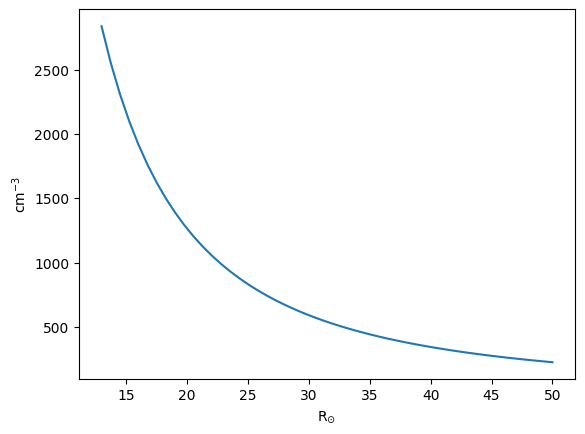

In [32]:
with quantity_support():
    plt.figure()
    plt.plot(radii.to(u.R_sun), n_e)
    plt.draw()

## Optimizing unit operations (if time)

[performance tips]: https://docs.astropy.org/en/stable/units/index.html#performance-tips
[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[`%timeit`]: https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit

Astropy's documentation includes [performance tips] for using [`astropy.units`] in computationally intensive situations. We can test it with [`%timeit`], which runs a command repeatedly to see how long it takes.

Putting compound units in parentheses speeds things up by reducing the number of copies made by the operation.

In [33]:
%timeit 1.6 * u.barn * u.Mpc
%timeit 1.6 * (u.barn * u.Mpc)

11.2 µs ± 836 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.71 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can assign a unit to a value using the [`Quantity`] class directly.

In [34]:
%timeit u.Quantity(1.6, u.barn * u.Mpc)

5.45 µs ± 88.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


What else can we do to save time from the above operation?

In [35]:
volume_unit = u.barn * u.Mpc  # pre-define the unit
%timeit u.Quantity(1.6, volume_unit)

1.85 µs ± 19.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Physical types (if time)

[physical type]: https://docs.astropy.org/en/stable/units/physical_types.html
[`physical_type`]: https://docs.astropy.org/en/stable/api/astropy.units.UnitBase.html#astropy.units.UnitBase.physical_type
[`get_physical_type()`]: https://docs.astropy.org/en/stable/api/astropy.units.get_physical_type.html#astropy.units.get_physical_type

A [physical type] corresponds to physical quantities with dimensionally compatible units. Astropy has functionality that represents different physical types. These physical type objects can be accessed using either the [`physical_type`] attribute of a unit or [`get_physical_type()`].

In [36]:
(u.m**2 / u.s).physical_type

PhysicalType({'diffusivity', 'kinematic viscosity'})

In [37]:
u.get_physical_type("number density")

PhysicalType('number density')

These physical type objects can be used for dimensional analysis.

In [38]:
energy_density = (u.J * u.m**-3).physical_type
velocity = u.get_physical_type("velocity")
print(energy_density * velocity)

energy flux/irradiance


There are some pretty obscure physical types too!

In [39]:
u.get_physical_type(u.m * u.s)

PhysicalType('absement')